Bibliothèques importées et répertoires créés
Données chargées avec succès

Aperçu des données:
       Date        HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  05/08/22  Crystal Palace        Arsenal     0     2   A     0     1   A   
1  06/08/22          Fulham      Liverpool     2     2   D     1     0   H   
2  06/08/22     Bournemouth    Aston Villa     2     0   H     1     0   H   
3  06/08/22           Leeds         Wolves     2     1   H     1     1   D   
4  06/08/22       Newcastle  Nott'm Forest     2     0   H     0     0   D   

    Referee  ...  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0  A Taylor  ...    2    2  16  11   3   5   1   2   0   0  
1  A Madley  ...    3    4   7   9   4   4   2   0   0   0  
2  P Bankes  ...    3    2  18  16   5   5   3   3   0   0  
3   R Jones  ...    4    6  13   9   6   4   2   0   0   0  
4  S Hooper  ...   10    0   9  14  11   1   0   3   0   0  

[5 rows x 22 columns]
 EXPLORATION DES DONNÉES DE MATCHS DE FOOTBALL


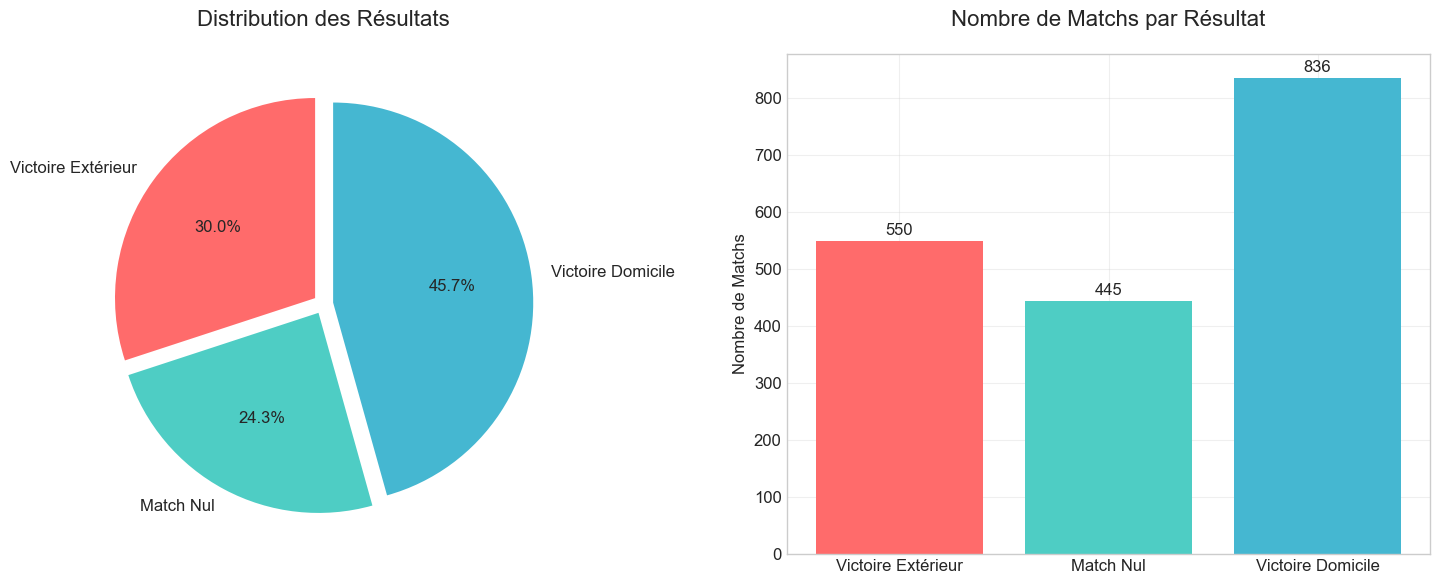


ANALYSE DES ÉQUIPES :


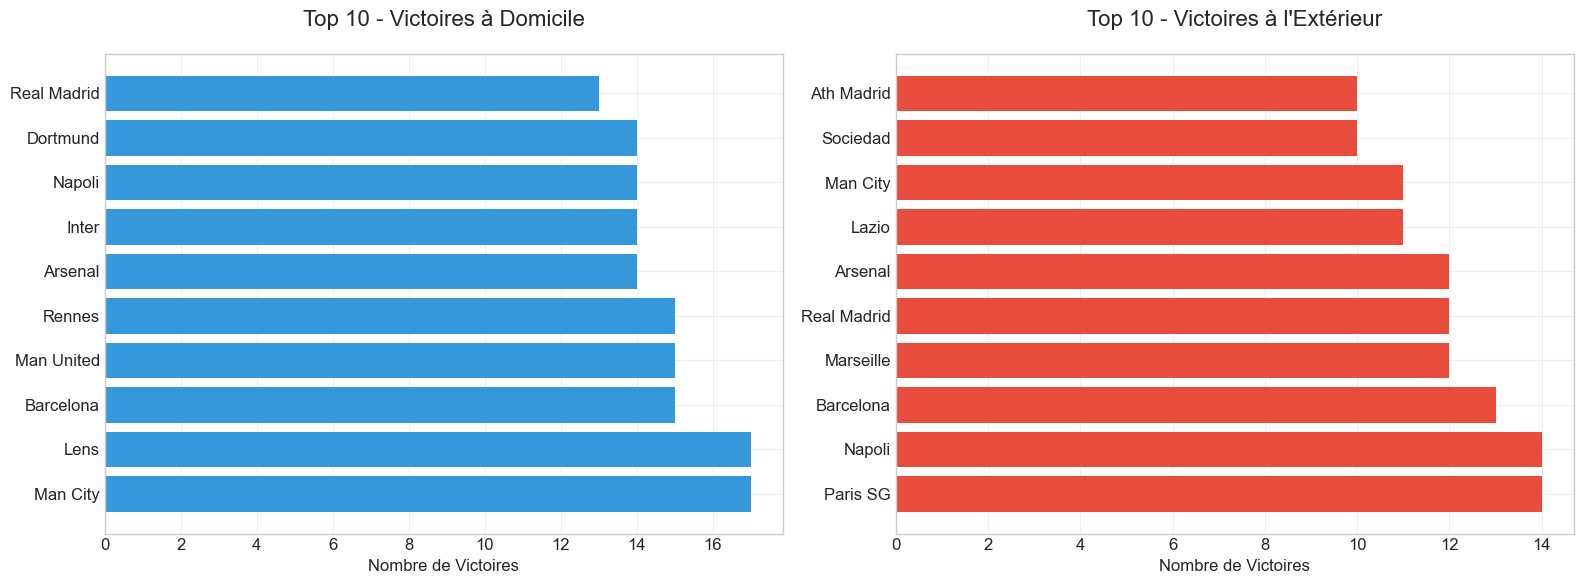


DISTRIBUTION DES BUTS :


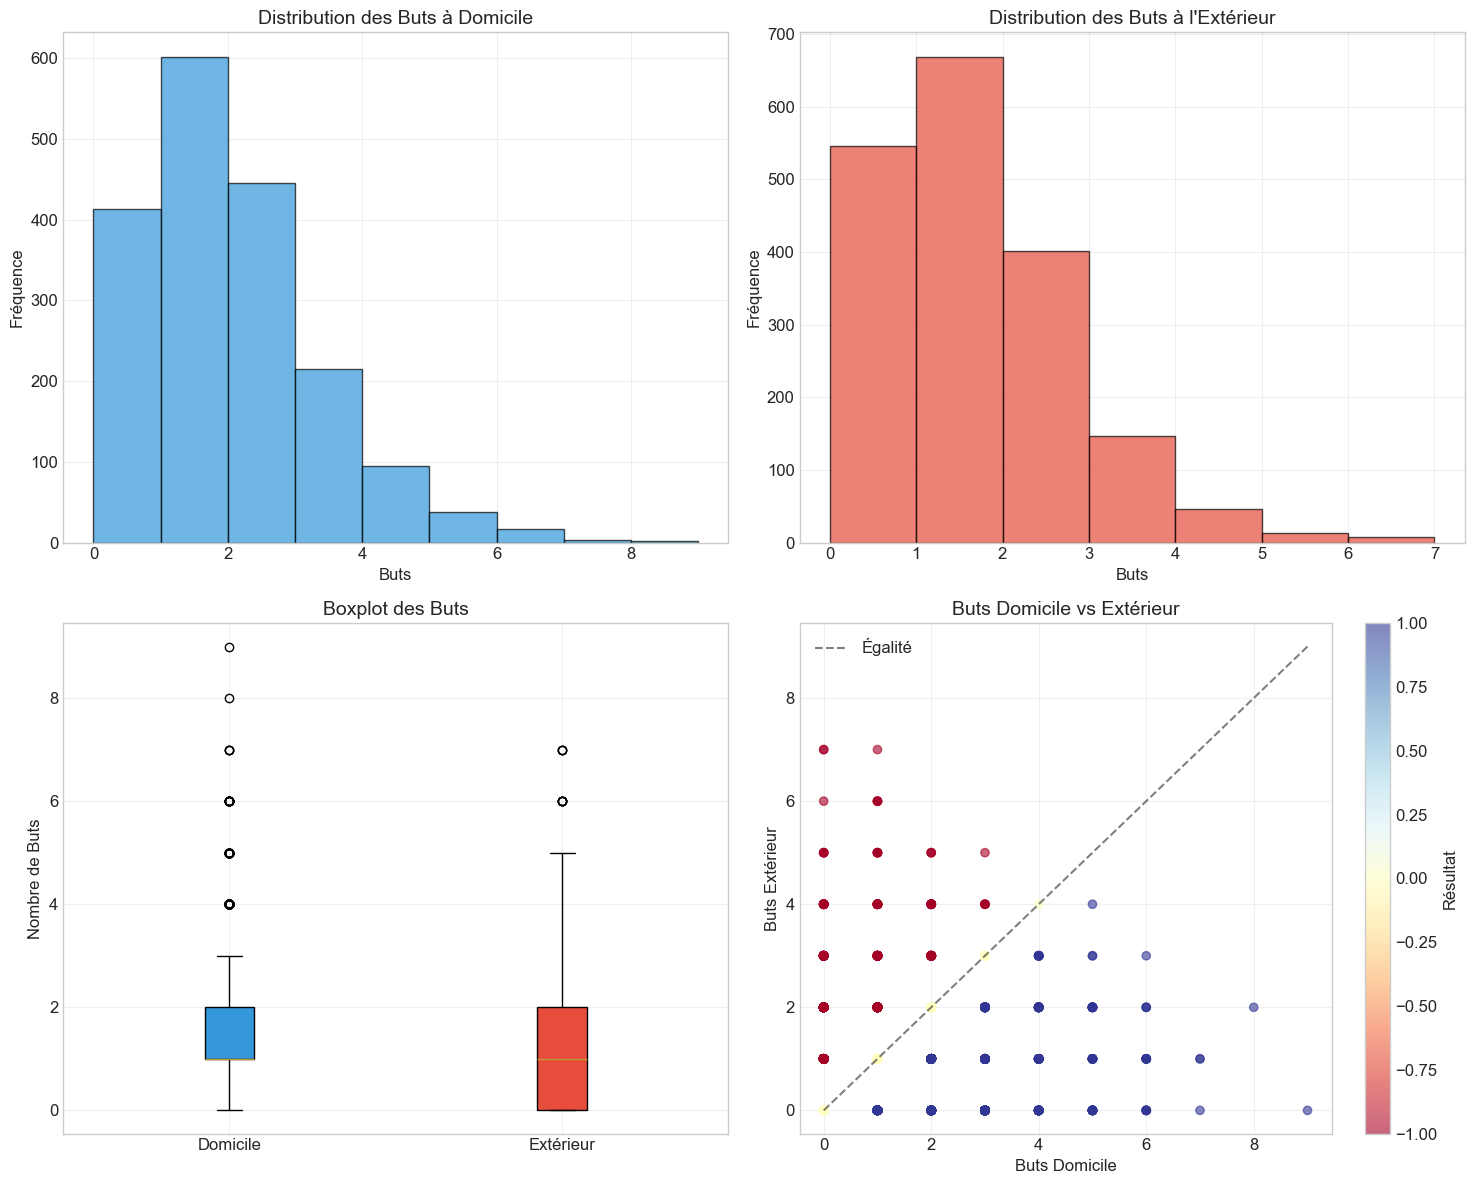


STATISTIQUES DE JEU :


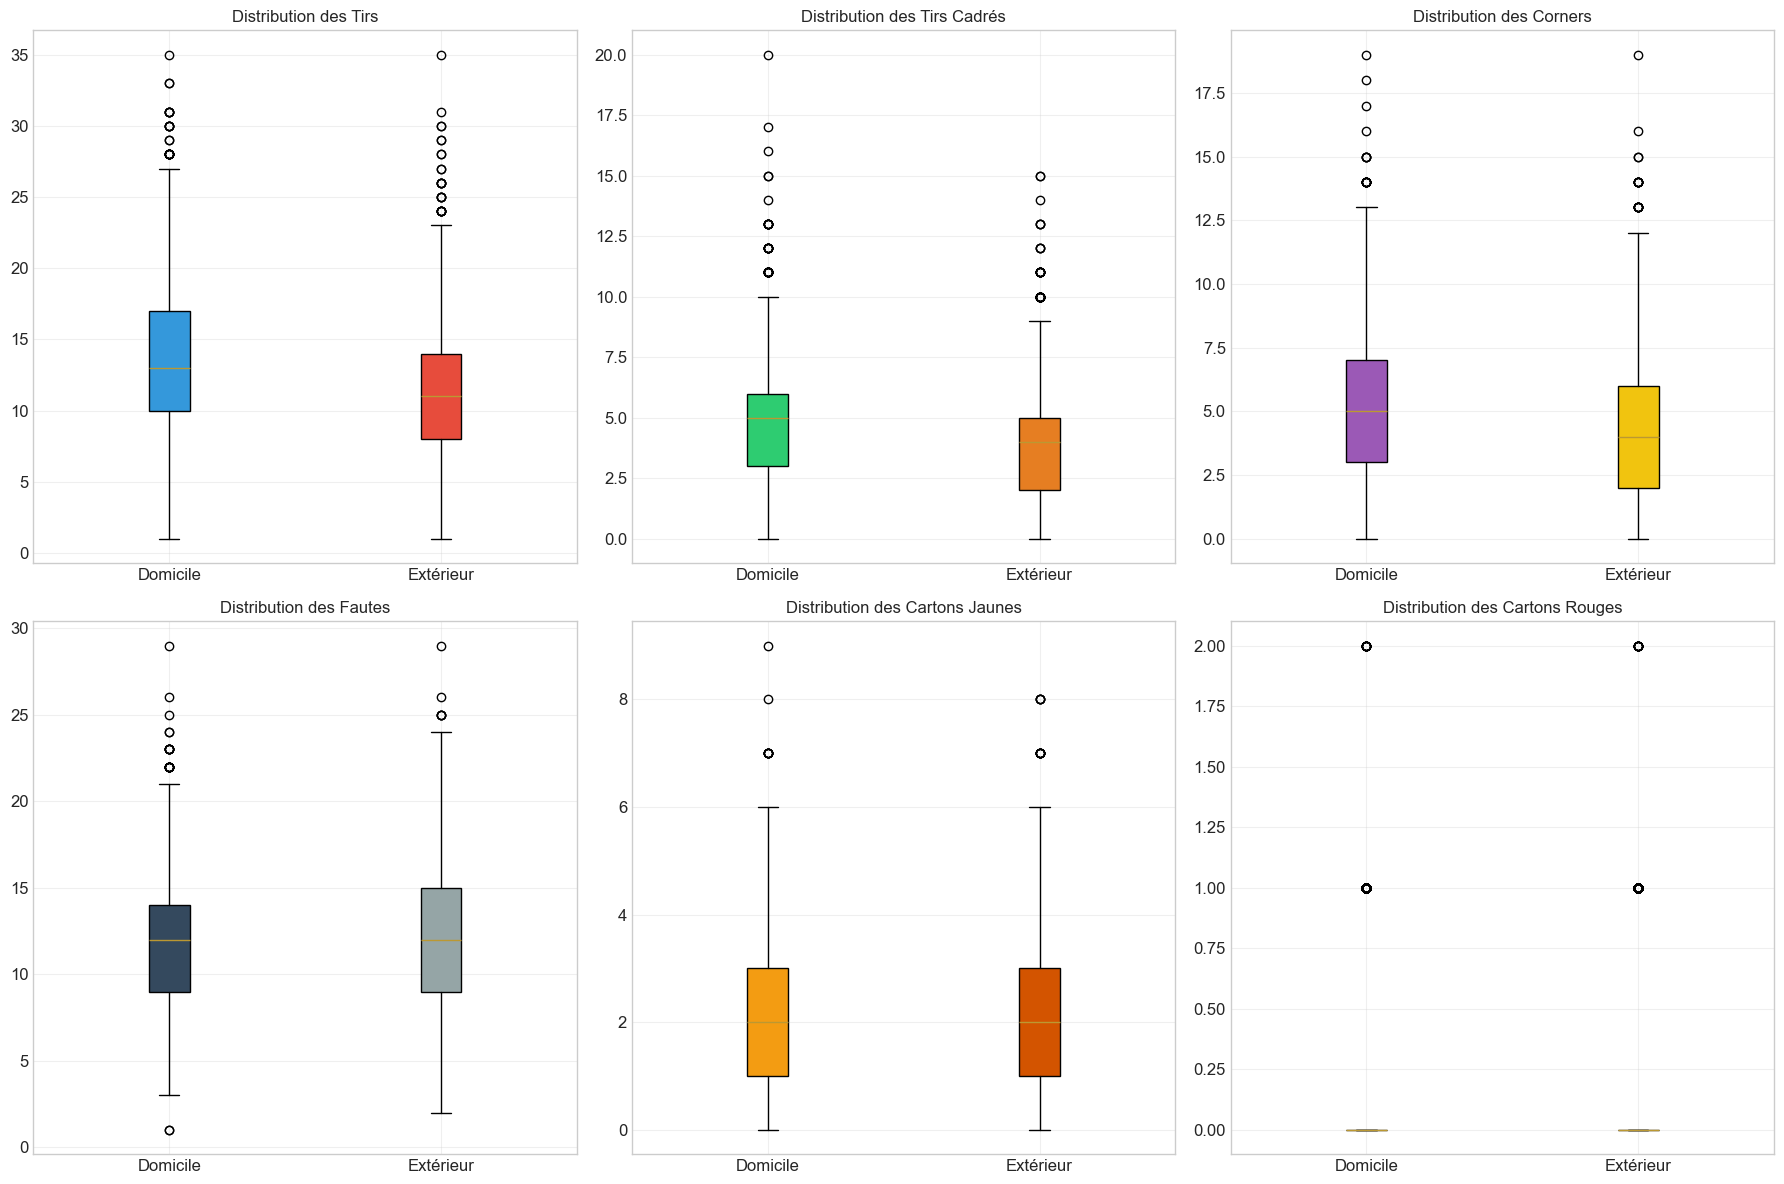


DIFFÉRENCES ENTRE DOMICILE ET EXTÉRIEUR :


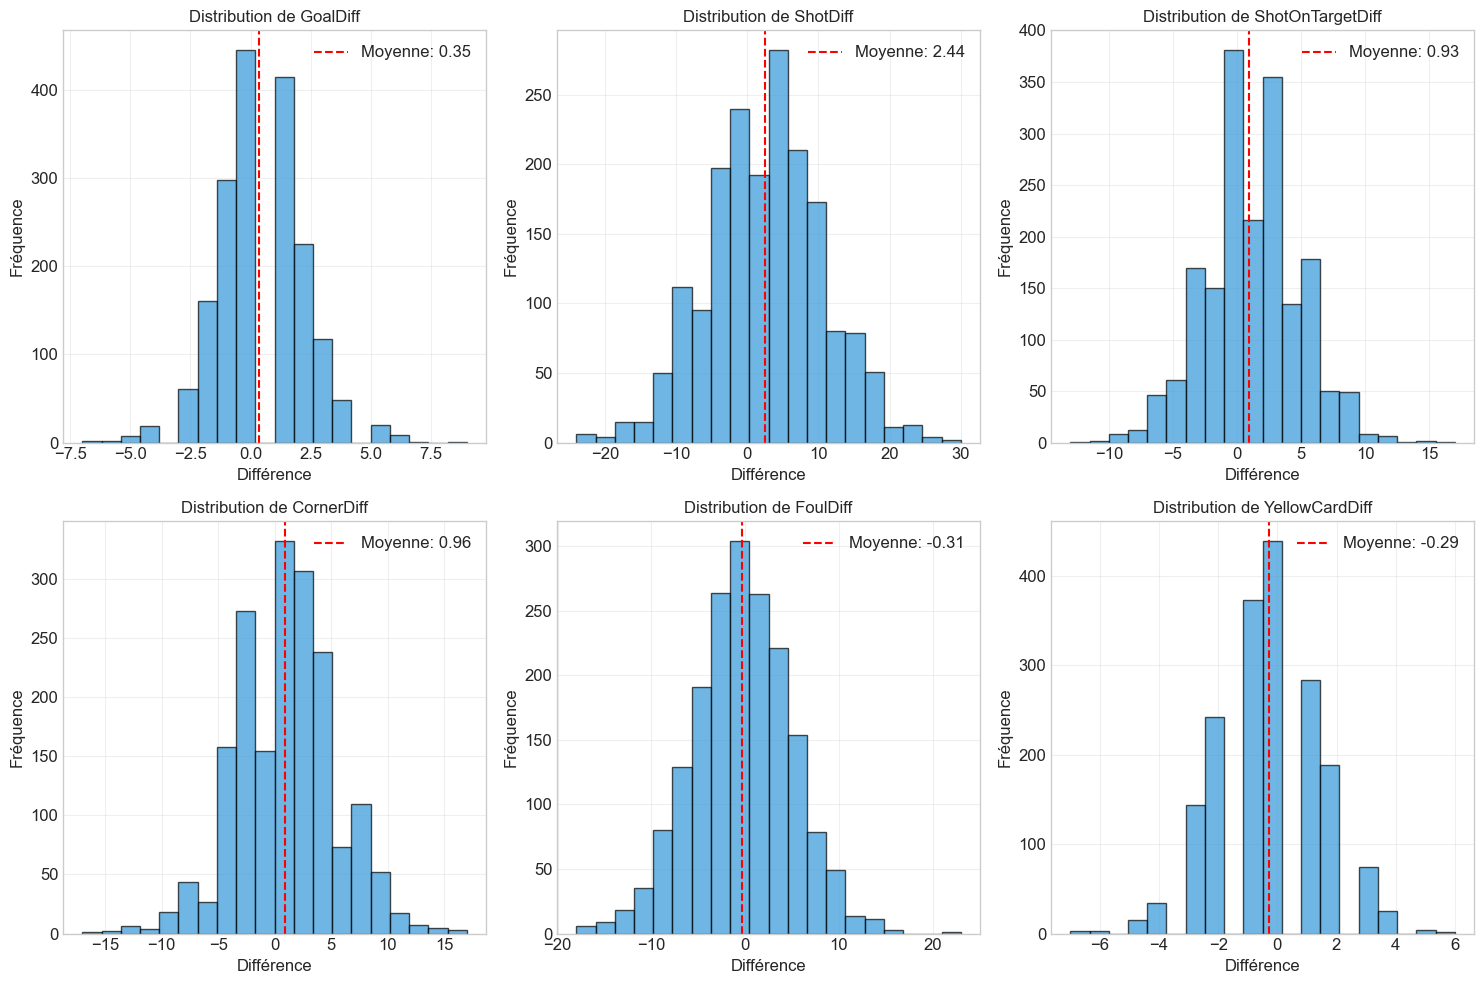


MATRICE DE CORRÉLATION :


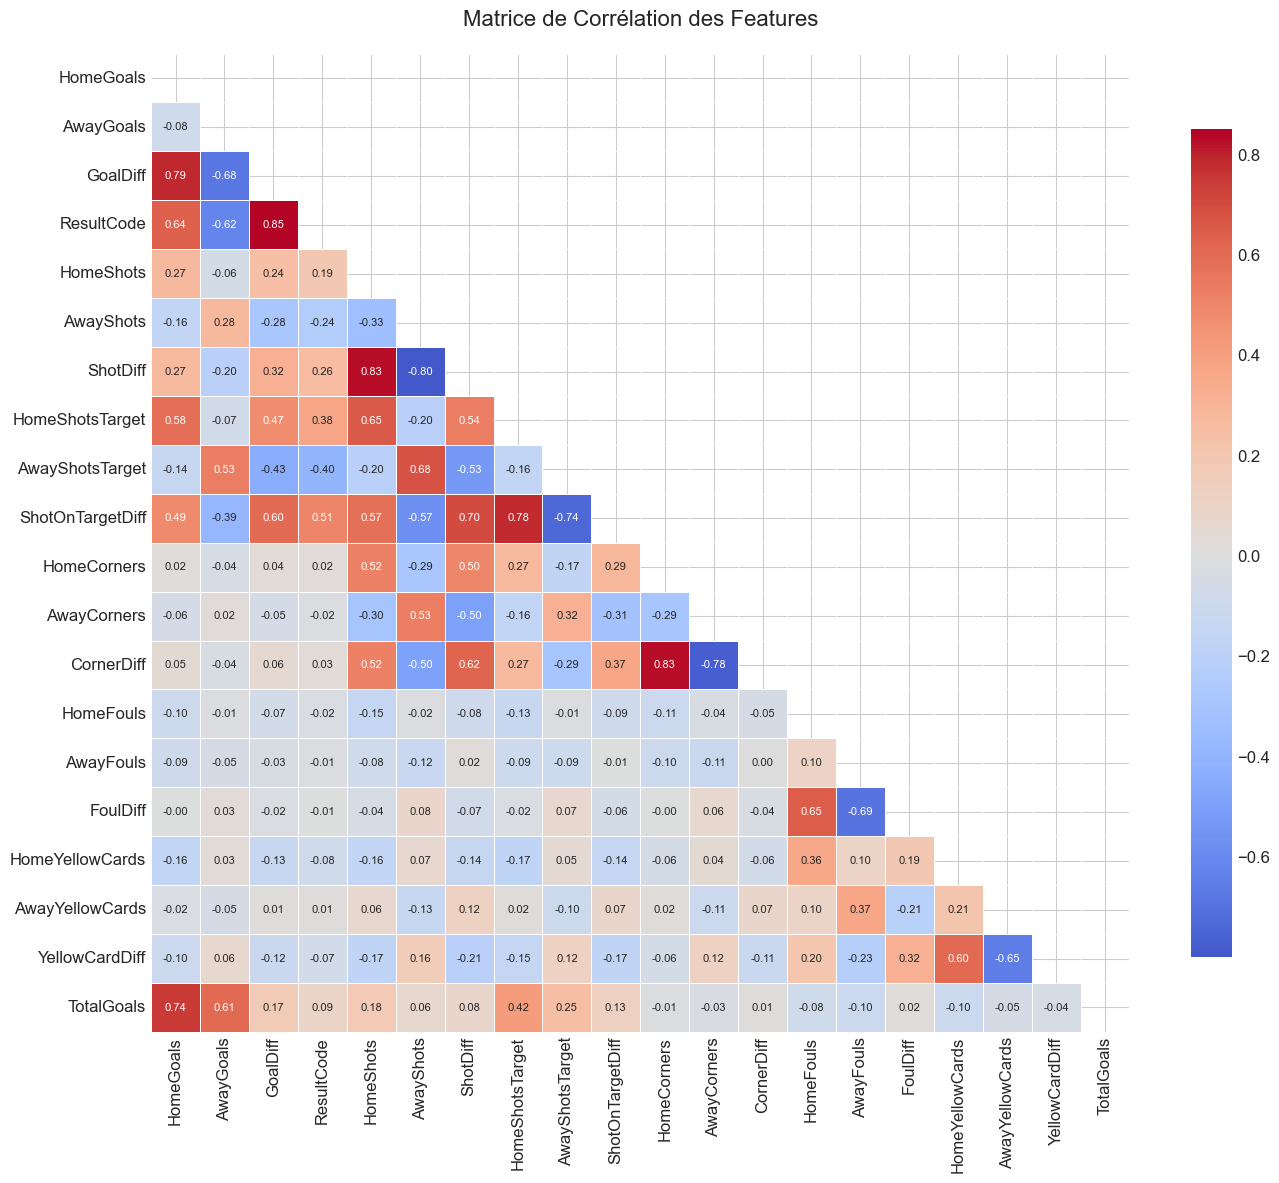


CORRÉLATIONS AVEC LA TARGET (ResultCode) :


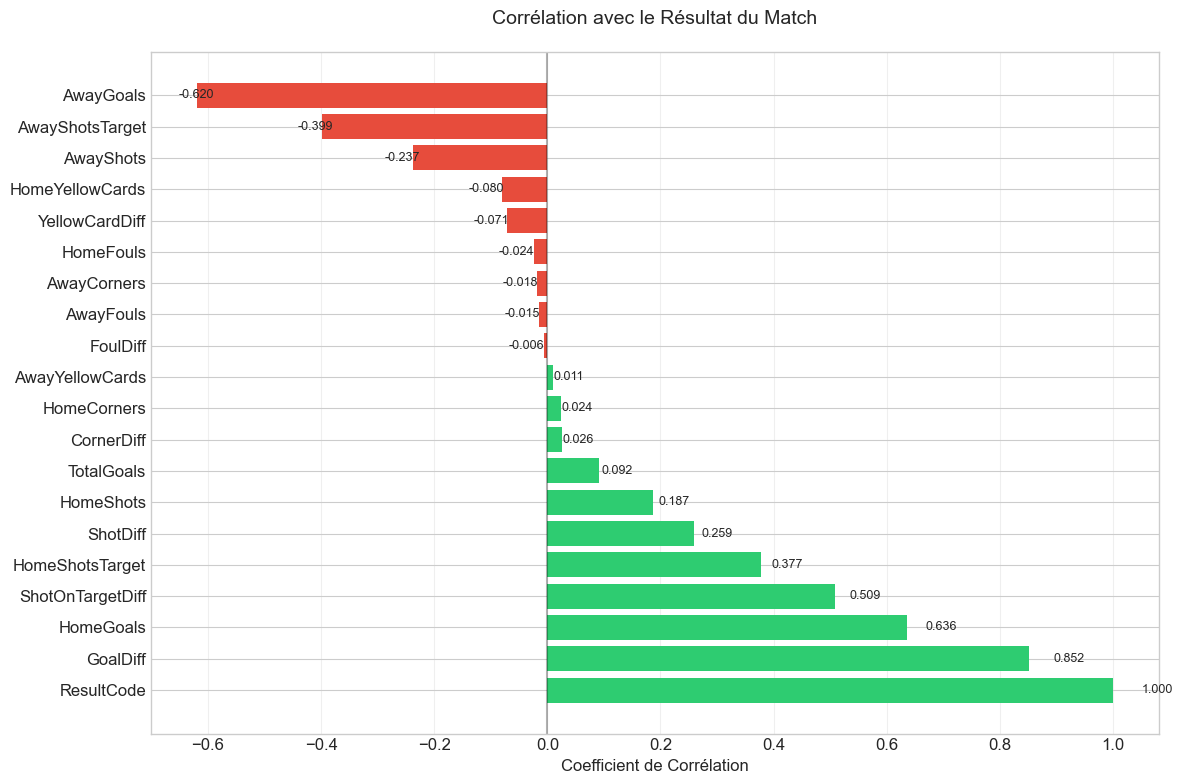


ANALYSE TEMPORELLE :


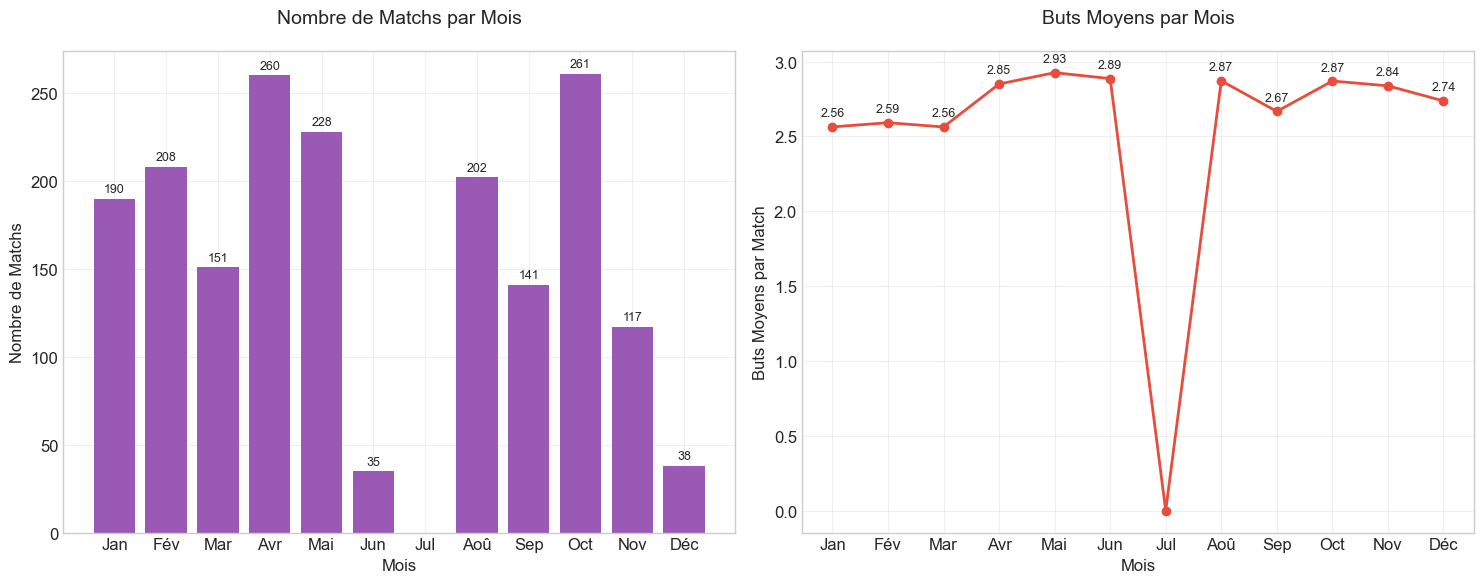


ANALYSE PAR ARBITRE :


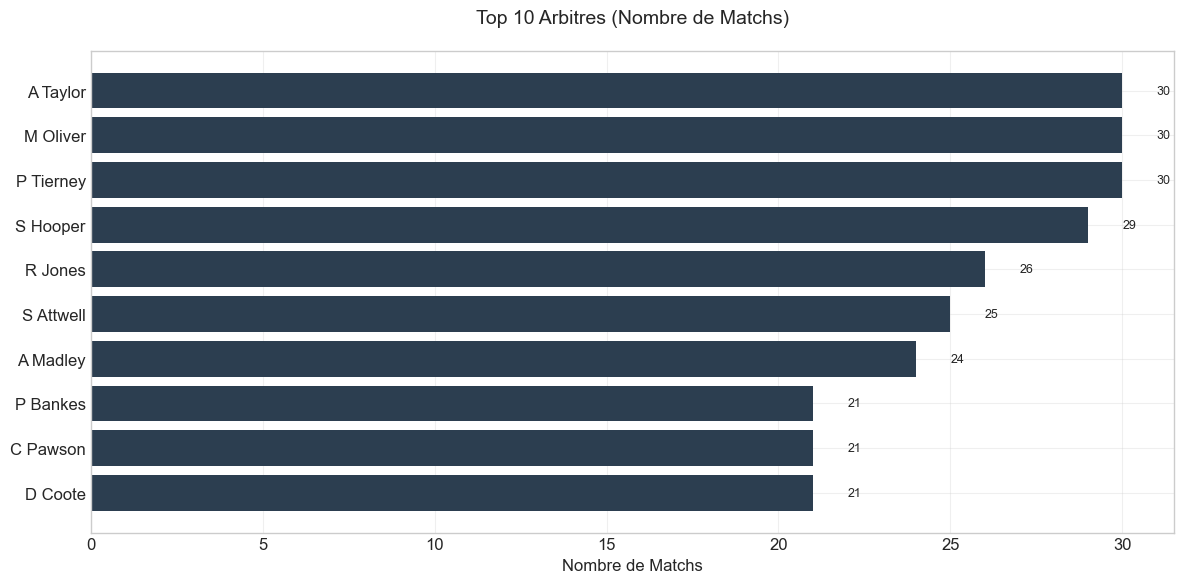


 CONCLUSIONS DE L'EXPLORATION DES DONNÉES

1. DISTRIBUTION DES RÉSULTATS (1831 matchs au total):
   • Victoire Extérieur   :  550 matchs ( 30.0%)
   • Match Nul            :  445 matchs ( 24.3%)
   • Victoire Domicile    :  836 matchs ( 45.7%)

2. STATISTIQUES DES BUTS :
   • Moyenne buts domicile      : 1.56
   • Moyenne buts extérieur     : 1.21
   • Score moyen total          : 2.77 buts/match
   • Écart type buts domicile   : 1.34
   • Écart type buts extérieur  : 1.12

3. CORRÉLATIONS IMPORTANTES :
   • GoalDiff             : 0.852
   • HomeGoals            : 0.636
   • AwayGoals            : 0.620
   • ShotOnTargetDiff     : 0.509
   • AwayShotsTarget      : 0.399

4. QUALITÉ DES DONNÉES :
   • Valeurs manquantes         : 1451
   • Doublons                   : 0
   • Plage de dates             : 2022-08-05 au 2023-06-05

5. INSIGHTS POUR LE ML :
   • Données équilibrées pour la classification
   • Variables fortement corrélées identifiées
   • Features dérivées créées (différen

In [1]:
# 01 - Exploration des Données
# Analyse exploratoire des matchs de football 2022-2023

# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

# Configuration des visualisations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Créer les répertoires nécessaires
os.makedirs('../visuals', exist_ok=True)

print("Bibliothèques importées et répertoires créés")

# %%
# Chargement des données avec vérification
data_path = "../data/raw/matches.csv"
try:
    df = pd.read_csv(data_path)
    print("Données chargées avec succès")
    
    # Afficher les premières lignes pour vérifier
    print("\nAperçu des données:")
    print(df.head())
    
except FileNotFoundError:
    print(f" Fichier non trouvé : {data_path}")
    exit()

print("=" * 70)
print(" EXPLORATION DES DONNÉES DE MATCHS DE FOOTBALL")
print("=" * 70)
print(f"\nDimensions du dataset : {df.shape[0]} matchs, {df.shape[1]} colonnes")

# %%
# Nettoyage et préparation des données
print("\n" + "="*50)
print("PRÉPARATION DES DONNÉES :")
print("="*50)

# Renommer les colonnes pour plus de clarté
column_mapping = {
    'Date': 'Date',
    'HomeTeam': 'HomeTeam',
    'AwayTeam': 'AwayTeam',
    'FTHG': 'HomeGoals',
    'FTAG': 'AwayGoals',
    'FTR': 'FullTimeResult',
    'HTHG': 'HT_HomeGoals',
    'HTAG': 'HT_AwayGoals',
    'HTR': 'HalfTimeResult',
    'Referee': 'Referee',
    'HS': 'HomeShots',
    'AS': 'AwayShots',
    'HST': 'HomeShotsTarget',
    'AST': 'AwayShotsTarget',
    'HF': 'HomeFouls',
    'AF': 'AwayFouls',
    'HC': 'HomeCorners',
    'AC': 'AwayCorners',
    'HY': 'HomeYellowCards',
    'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards',
    'AR': 'AwayRedCards'
}

# Renommer les colonnes
df = df.rename(columns=column_mapping)

# Convertir le résultat en code numérique
result_mapping = {'H': 1, 'D': 0, 'A': -1}
df['ResultCode'] = df['FullTimeResult'].map(result_mapping)

# Calculer les statistiques dérivées
df['GoalDiff'] = df['HomeGoals'] - df['AwayGoals']
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']
df['ShotDiff'] = df['HomeShots'] - df['AwayShots']
df['ShotOnTargetDiff'] = df['HomeShotsTarget'] - df['AwayShotsTarget']
df['CornerDiff'] = df['HomeCorners'] - df['AwayCorners']
df['YellowCardDiff'] = df['HomeYellowCards'] - df['AwayYellowCards']
df['RedCardDiff'] = df['HomeRedCards'] - df['AwayRedCards']
df['FoulDiff'] = df['HomeFouls'] - df['AwayFouls']

# Afficher les nouvelles colonnes
print("\nColonnes disponibles après traitement:")
print(df.columns.tolist())

# %%
# Aperçu des données
print("\n" + "="*50)
print("APERÇU DES DONNÉES :")
print("="*50)
print(f"\n5 premières lignes :")
print(df.head())
print(f"\nTypes de données :")
print(df.dtypes)

# %%
# Vérification des valeurs manquantes
print("\n" + "="*50)
print("VALEURS MANQUANTES :")
print("="*50)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs Manquantes': missing_values,
    'Pourcentage': missing_percent.round(2)
})
print(missing_df[missing_df['Valeurs Manquantes'] > 0])

# %%
# Statistiques descriptives
print("\n" + "="*50)
print("STATISTIQUES DESCRIPTIVES :")
print("="*50)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe().round(2))

# %%
# Distribution des résultats
print("\n" + "="*50)
print("DISTRIBUTION DES RÉSULTATS :")
print("="*50)

result_labels = {-1: 'Victoire Extérieur', 0: 'Match Nul', 1: 'Victoire Domicile'}
result_counts = df['ResultCode'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Diagramme circulaire
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
labels = [result_labels.get(i, f'Code {i}') for i in result_counts.index]

axes[0].pie(result_counts.values, labels=labels, autopct='%1.1f%%',
           colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
axes[0].set_title('Distribution des Résultats', fontsize=16, pad=20)

# Diagramme à barres
bars = axes[1].bar(labels, result_counts.values, color=colors)
axes[1].set_title('Nombre de Matchs par Résultat', fontsize=16, pad=20)
axes[1].set_ylabel('Nombre de Matchs')
axes[1].grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, count in zip(bars, result_counts.values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../visuals/results_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Distribution des équipes
print("\n" + "="*50)
print("ANALYSE DES ÉQUIPES :")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 équipes à domicile
home_wins = df[df['ResultCode'] == 1]['HomeTeam'].value_counts().head(10)
bars1 = axes[0].barh(home_wins.index, home_wins.values, color='#3498db')
axes[0].set_title('Top 10 - Victoires à Domicile', fontsize=16, pad=20)
axes[0].set_xlabel('Nombre de Victoires')
axes[0].grid(True, alpha=0.3)

# Top 10 équipes à l'extérieur
away_wins = df[df['ResultCode'] == -1]['AwayTeam'].value_counts().head(10)
bars2 = axes[1].barh(away_wins.index, away_wins.values, color='#e74c3c')
axes[1].set_title('Top 10 - Victoires à l\'Extérieur', fontsize=16, pad=20)
axes[1].set_xlabel('Nombre de Victoires')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visuals/team_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Distribution des buts
print("\n" + "="*50)
print("DISTRIBUTION DES BUTS :")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogramme des buts à domicile
max_home_goals = min(df['HomeGoals'].max() + 1, 10)
axes[0, 0].hist(df['HomeGoals'], bins=range(0, max_home_goals), 
               edgecolor='black', alpha=0.7, color='#3498db')
axes[0, 0].set_title('Distribution des Buts à Domicile', fontsize=14)
axes[0, 0].set_xlabel('Buts')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# Histogramme des buts à l'extérieur
max_away_goals = min(df['AwayGoals'].max() + 1, 10)
axes[0, 1].hist(df['AwayGoals'], bins=range(0, max_away_goals), 
               edgecolor='black', alpha=0.7, color='#e74c3c')
axes[0, 1].set_title('Distribution des Buts à l\'Extérieur', fontsize=14)
axes[0, 1].set_xlabel('Buts')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot comparatif
boxplot_data = [df['HomeGoals'], df['AwayGoals']]
box = axes[1, 0].boxplot(boxplot_data, patch_artist=True,
                         labels=['Domicile', 'Extérieur'])
box['boxes'][0].set_facecolor('#3498db')
box['boxes'][1].set_facecolor('#e74c3c')
axes[1, 0].set_title('Boxplot des Buts', fontsize=14)
axes[1, 0].set_ylabel('Nombre de Buts')
axes[1, 0].grid(True, alpha=0.3)

# Scatter plot buts domicile vs extérieur
scatter = axes[1, 1].scatter(df['HomeGoals'], df['AwayGoals'], 
                            alpha=0.6, c=df['ResultCode'], cmap='RdYlBu')
axes[1, 1].set_title('Buts Domicile vs Extérieur', fontsize=14)
axes[1, 1].set_xlabel('Buts Domicile')
axes[1, 1].set_ylabel('Buts Extérieur')
axes[1, 1].grid(True, alpha=0.3)

# Ajouter la ligne d'égalité
max_goals = max(df['HomeGoals'].max(), df['AwayGoals'].max())
axes[1, 1].plot([0, max_goals], [0, max_goals], 'k--', alpha=0.5, label='Égalité')
axes[1, 1].legend()

# Ajouter une colorbar
plt.colorbar(scatter, ax=axes[1, 1], label='Résultat')

plt.tight_layout()
plt.savefig('../visuals/goals_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Analyse des statistiques de jeu
print("\n" + "="*50)
print("STATISTIQUES DE JEU :")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

stats_config = [
    ('HomeShots', 'AwayShots', 'Tirs', '#3498db', '#e74c3c'),
    ('HomeShotsTarget', 'AwayShotsTarget', 'Tirs Cadrés', '#2ecc71', '#e67e22'),
    ('HomeCorners', 'AwayCorners', 'Corners', '#9b59b6', '#f1c40f'),
    ('HomeFouls', 'AwayFouls', 'Fautes', '#34495e', '#95a5a6'),
    ('HomeYellowCards', 'AwayYellowCards', 'Cartons Jaunes', '#f39c12', '#d35400'),
    ('HomeRedCards', 'AwayRedCards', 'Cartons Rouges', '#c0392b', '#8e44ad')
]

for idx, (home_stat, away_stat, title, home_color, away_color) in enumerate(stats_config):
    if home_stat in df.columns and away_stat in df.columns:
        row = idx // 3
        col = idx % 3
        
        # Boxplot comparatif
        boxplot_data = [df[home_stat], df[away_stat]]
        box = axes[row, col].boxplot(boxplot_data, patch_artist=True,
                                     labels=['Domicile', 'Extérieur'])
        box['boxes'][0].set_facecolor(home_color)
        box['boxes'][1].set_facecolor(away_color)
        axes[row, col].set_title(f'Distribution des {title}', fontsize=12)
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visuals/game_stats_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Analyse des différences
print("\n" + "="*50)
print("DIFFÉRENCES ENTRE DOMICILE ET EXTÉRIEUR :")
print("="*50)

diff_stats = ['GoalDiff', 'ShotDiff', 'ShotOnTargetDiff', 'CornerDiff', 'FoulDiff', 'YellowCardDiff']
available_diff_stats = [stat for stat in diff_stats if stat in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, stat in enumerate(available_diff_stats[:6]):
    row = idx // 3
    col = idx % 3
    
    # Histogramme des différences
    axes[row, col].hist(df[stat], bins=20, edgecolor='black', alpha=0.7, color='#3498db')
    axes[row, col].axvline(x=df[stat].mean(), color='red', linestyle='--', label=f'Moyenne: {df[stat].mean():.2f}')
    axes[row, col].set_title(f'Distribution de {stat}', fontsize=12)
    axes[row, col].set_xlabel('Différence')
    axes[row, col].set_ylabel('Fréquence')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visuals/diff_stats_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Matrice de corrélation
print("\n" + "="*50)
print("MATRICE DE CORRÉLATION :")
print("="*50)

# Sélectionner les colonnes numériques importantes
corr_columns = [
    'HomeGoals', 'AwayGoals', 'GoalDiff', 'ResultCode',
    'HomeShots', 'AwayShots', 'ShotDiff',
    'HomeShotsTarget', 'AwayShotsTarget', 'ShotOnTargetDiff',
    'HomeCorners', 'AwayCorners', 'CornerDiff',
    'HomeFouls', 'AwayFouls', 'FoulDiff',
    'HomeYellowCards', 'AwayYellowCards', 'YellowCardDiff',
    'TotalGoals'
]

# Garder seulement les colonnes disponibles
available_cols = [col for col in corr_columns if col in df.columns]
if len(available_cols) > 1:
    corr_matrix = df[available_cols].corr()
    
    fig, ax = plt.subplots(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8},
                fmt='.2f', ax=ax, mask=mask, annot_kws={"size": 8})
    ax.set_title('Matrice de Corrélation des Features', fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig('../visuals/correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Pas assez de colonnes numériques pour créer une matrice de corrélation")

# %%
# Analyse des corrélations avec la target
if 'ResultCode' in df.columns and len(available_cols) > 1:
    print("\n" + "="*50)
    print("CORRÉLATIONS AVEC LA TARGET (ResultCode) :")
    print("="*50)
    
    if 'ResultCode' in corr_matrix.columns:
        corr_with_target = corr_matrix['ResultCode'].sort_values(ascending=False)
        
        fig, ax = plt.subplots(figsize=(12, 8))
        bars = ax.barh(corr_with_target.index, corr_with_target.values,
                       color=['#2ecc71' if x > 0 else '#e74c3c' for x in corr_with_target.values])
        ax.set_title('Corrélation avec le Résultat du Match', fontsize=14, pad=20)
        ax.set_xlabel('Coefficient de Corrélation')
        ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        ax.grid(True, alpha=0.3, axis='x')
        
        # Ajouter les valeurs
        for bar, value in zip(bars, corr_with_target.values):
            width = bar.get_width()
            ax.text(width * 1.05 if width >= 0 else width * 0.95, 
                    bar.get_y() + bar.get_height()/2,
                    f'{value:.3f}', 
                    va='center',
                    ha='left' if width >= 0 else 'right',
                    fontsize=9)
        
        plt.tight_layout()
        plt.savefig('../visuals/target_correlation.png', dpi=300, bbox_inches='tight')
        plt.show()

# %%
# Analyse temporelle
if 'Date' in df.columns:
    print("\n" + "="*50)
    print("ANALYSE TEMPORELLE :")
    print("="*50)
    
    try:
        # Convertir la date
        df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y', errors='coerce')
        
        # Extraire le mois
        df['Month'] = df['Date'].dt.month
        df['MonthName'] = df['Date'].dt.strftime('%b')
        
        # Nombre de matchs par mois
        matches_by_month = df.groupby('Month').size()
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Diagramme à barres
        months_order = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
                       'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
        
        # Réorganiser les données selon l'ordre des mois
        month_counts = []
        for month_num in range(1, 13):
            if month_num in matches_by_month.index:
                month_counts.append(matches_by_month[month_num])
            else:
                month_counts.append(0)
        
        bars = axes[0].bar(months_order, month_counts, color='#9b59b6')
        axes[0].set_title('Nombre de Matchs par Mois', fontsize=14, pad=20)
        axes[0].set_xlabel('Mois')
        axes[0].set_ylabel('Nombre de Matchs')
        axes[0].grid(True, alpha=0.3)
        
        # Ajouter les valeurs sur les barres
        for bar, count in zip(bars, month_counts):
            height = bar.get_height()
            if height > 0:
                axes[0].text(bar.get_x() + bar.get_width()/2., height + 2,
                            f'{int(count)}', ha='center', va='bottom', fontsize=9)
        
        # Buts moyens par mois
        if 'TotalGoals' in df.columns:
            goals_by_month = df.groupby('Month')['TotalGoals'].mean()
            goals_list = []
            for month_num in range(1, 13):
                if month_num in goals_by_month.index:
                    goals_list.append(goals_by_month[month_num])
                else:
                    goals_list.append(0)
            
            axes[1].plot(months_order, goals_list, marker='o', color='#e74c3c', linewidth=2)
            axes[1].set_title('Buts Moyens par Mois', fontsize=14, pad=20)
            axes[1].set_xlabel('Mois')
            axes[1].set_ylabel('Buts Moyens par Match')
            axes[1].grid(True, alpha=0.3)
            
            # Ajouter les valeurs sur les points
            for i, (month, goals) in enumerate(zip(months_order, goals_list)):
                if goals > 0:
                    axes[1].text(i, goals + 0.05, f'{goals:.2f}', 
                                ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.savefig('../visuals/temporal_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Erreur dans l'analyse temporelle : {e}")

# %%
# Analyse par arbitre
if 'Referee' in df.columns:
    print("\n" + "="*50)
    print("ANALYSE PAR ARBITRE :")
    print("="*50)
    
    # Top 10 arbitres ayant arbitré le plus de matchs
    top_referees = df['Referee'].value_counts().head(10)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.barh(top_referees.index, top_referees.values, color='#2c3e50')
    ax.set_title('Top 10 Arbitres (Nombre de Matchs)', fontsize=14, pad=20)
    ax.set_xlabel('Nombre de Matchs')
    ax.invert_yaxis()  # Afficher le plus grand en haut
    ax.grid(True, alpha=0.3)
    
    # Ajouter les valeurs
    for bar, count in zip(bars, top_referees.values):
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2,
                f'{count}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('../visuals/referee_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# %%
# Conclusions de l'exploration
print("\n" + "=" * 70)
print(" CONCLUSIONS DE L'EXPLORATION DES DONNÉES")
print("=" * 70)

print(f"\n1. DISTRIBUTION DES RÉSULTATS ({len(df)} matchs au total):")
for result_code in [-1, 0, 1]:
    count = result_counts.get(result_code, 0)
    percentage = (count / len(df)) * 100
    print(f"   • {result_labels[result_code]:20} : {count:4d} matchs ({percentage:5.1f}%)")

print("\n2. STATISTIQUES DES BUTS :")
print(f"   • Moyenne buts domicile      : {df['HomeGoals'].mean():.2f}")
print(f"   • Moyenne buts extérieur     : {df['AwayGoals'].mean():.2f}")
print(f"   • Score moyen total          : {df['TotalGoals'].mean():.2f} buts/match")
print(f"   • Écart type buts domicile   : {df['HomeGoals'].std():.2f}")
print(f"   • Écart type buts extérieur  : {df['AwayGoals'].std():.2f}")

print("\n3. CORRÉLATIONS IMPORTANTES :")
if 'ResultCode' in corr_matrix.columns:
    top_correlations = corr_matrix['ResultCode'].abs().sort_values(ascending=False).head(6)
    for feature, corr in top_correlations.items():
        if feature != 'ResultCode':
            print(f"   • {feature:20} : {corr:.3f}")

print("\n4. QUALITÉ DES DONNÉES :")
print(f"   • Valeurs manquantes         : {df.isnull().sum().sum()}")
print(f"   • Doublons                   : {df.duplicated().sum()}")
print(f"   • Plage de dates             : {df['Date'].min().date()} au {df['Date'].max().date()}")

print("\n5. INSIGHTS POUR LE ML :")
print("   • Données équilibrées pour la classification")
print("   • Variables fortement corrélées identifiées")
print("   • Features dérivées créées (différences)")
print("   • Données temporelles disponibles pour analyse")

print("\n" + "=" * 70)
print(" EXPLORATION TERMINÉE - PRÊT POUR LE FEATURE ENGINEERING")
print("=" * 70)

# Sauvegarder le dataset traité
output_path = "../data/processed/matches_processed.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"\n Dataset traité sauvegardé : {output_path}")